Found 640 images belonging to 5 classes.
Found 160 images belonging to 5 classes.
Epoch 1/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 365ms/step - accuracy: 0.8203 - loss: 0.5285 - val_accuracy: 0.9250 - val_loss: 0.1808
Epoch 2/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 298ms/step - accuracy: 0.9734 - loss: 0.0918 - val_accuracy: 0.9312 - val_loss: 0.1618
Epoch 3/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 306ms/step - accuracy: 0.9859 - loss: 0.0434 - val_accuracy: 0.9438 - val_loss: 0.1609
Epoch 4/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 303ms/step - accuracy: 0.9969 - loss: 0.0282 - val_accuracy: 0.9438 - val_loss: 0.1389
Epoch 5/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 301ms/step - accuracy: 0.9984 - loss: 0.0123 - val_accuracy: 0.9250 - val_loss: 0.1423
Epoch 6/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 308ms/step - accuracy: 1.0000 - loss: 0.0079 - val_accuracy: 0.9438 - val_loss: 0.1452
Epoch 7/15
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 308ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 0.9375 - val_loss: 0.1361
Epoch 8/15
40/4

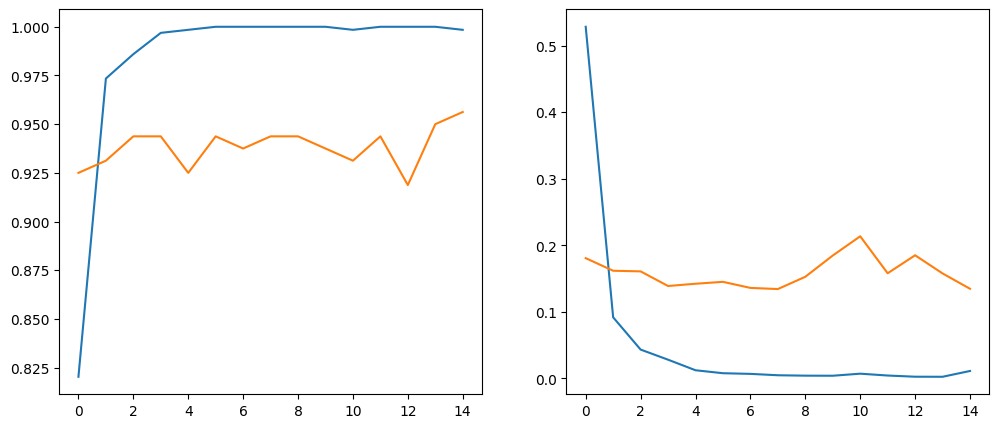

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted Fruit: grapes


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import matplotlib.pyplot as plt
import numpy as np
import cv2
import joblib

img_size = (224, 224)
batch_size = 16
epochs = 15

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

train_data = train_datagen.flow_from_directory(
    r"C:\Users\vishn\Downloads\Fruit_image_project\train",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

test_data = test_datagen.flow_from_directory(
    r"C:\Users\vishn\Downloads\Fruit_image_project\test",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

base_model = MobileNetV2(
    weights="imagenet",
    include_top=False,
    input_shape=(img_size[0], img_size[1], 3)
)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(train_data.num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

history = model.fit(
    train_data,
    epochs=epochs,
    validation_data=test_data
)

model.save("fruit_mobilenet_model.h5")
joblib.dump(train_data.class_indices, "class_indices.pkl")

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.show()

model = load_model("fruit_mobilenet_model.h5")
class_indices = joblib.load("class_indices.pkl")
class_names = list(class_indices.keys())

img_path = r"C:\Users\vishn\Downloads\grapesdemo.jpg"
img = cv2.imread(img_path)

if img is None:
    print("Image not found")
else:
    img = cv2.resize(img, img_size)
    img = preprocess_input(np.expand_dims(img, axis=0))
    prediction = model.predict(img)
    class_index = np.argmax(prediction)
    print("Predicted Fruit:", class_names[class_index])


In [2]:
import os
os.listdir()

['.ipynb_checkpoints',
 'class_indices.pkl',
 'fruit_cnn.ipynb',
 'fruit_mobilenet_model.h5',
 'test',
 'train']